In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import signal
import copy
import pyfonts
import h5py

import matplotlib.font_manager
font_names = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
# Print unique sorted names to find the exact name of the font you want to use
print(sorted(set(font_names)))
font = pyfonts.load_google_font("Average Sans")

['Adobe Arabic', 'Adobe Fan Heiti Std', 'Adobe Gothic Std', 'Adobe Hebrew', 'Adobe Heiti Std', 'Adobe Ming Std', 'Adobe Myungjo Std', 'Adobe Pi Std', 'Adobe Song Std', 'Adobe Thai', 'Agency FB', 'Algerian', 'Arial', 'Arial Rounded MT Bold', 'Bahnschrift', 'Baskerville Old Face', 'Bauhaus 93', 'Bell MT', 'Berlin Sans FB', 'Berlin Sans FB Demi', 'Bernard MT Condensed', 'Blackadder ITC', 'Bodoni MT', 'Book Antiqua', 'Bookman Old Style', 'Bookshelf Symbol 7', 'Bradley Hand ITC', 'Britannic Bold', 'Broadway', 'Brush Script MT', 'Calibri', 'Californian FB', 'Calisto MT', 'Cambria', 'Candara', 'Castellar', 'Centaur', 'Century', 'Century Gothic', 'Century Schoolbook', 'Chiller', 'Colonna MT', 'Comic Sans MS', 'Consolas', 'Constantia', 'Cooper Black', 'Copperplate Gothic Bold', 'Copperplate Gothic Light', 'Corbel', 'Courier New', 'Courier Std', 'Curlz MT', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Dubai', 'Ebrima', 'Edwardian Script ITC',

In [4]:
#Set global plotting parameters
mpl.rcParams['agg.path.chunksize'] = 10000
mpl.rcParams['figure.dpi'] = 600

font = pyfonts.load_google_font("Average Sans")
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ['Verdana']#, "DejaVu Sans", "Liberation Sans", "Verdana", "Arial", "Helvetica", "sans-serif"]
SIZE_DEFAULT = 10
plt.rcParams["font.size"] = SIZE_DEFAULT
plt.rcParams["axes.titlesize"] = SIZE_DEFAULT + 6
plt.rcParams["axes.labelsize"] = SIZE_DEFAULT + 4
plt.rcParams["xtick.labelsize"] = SIZE_DEFAULT
plt.rcParams["ytick.labelsize"] = SIZE_DEFAULT

fig_width = 6  # inches
fig_height = 3.5  # inches
plt.rcParams["figure.figsize"] = (fig_width, fig_height)

wong_colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', '#000000']

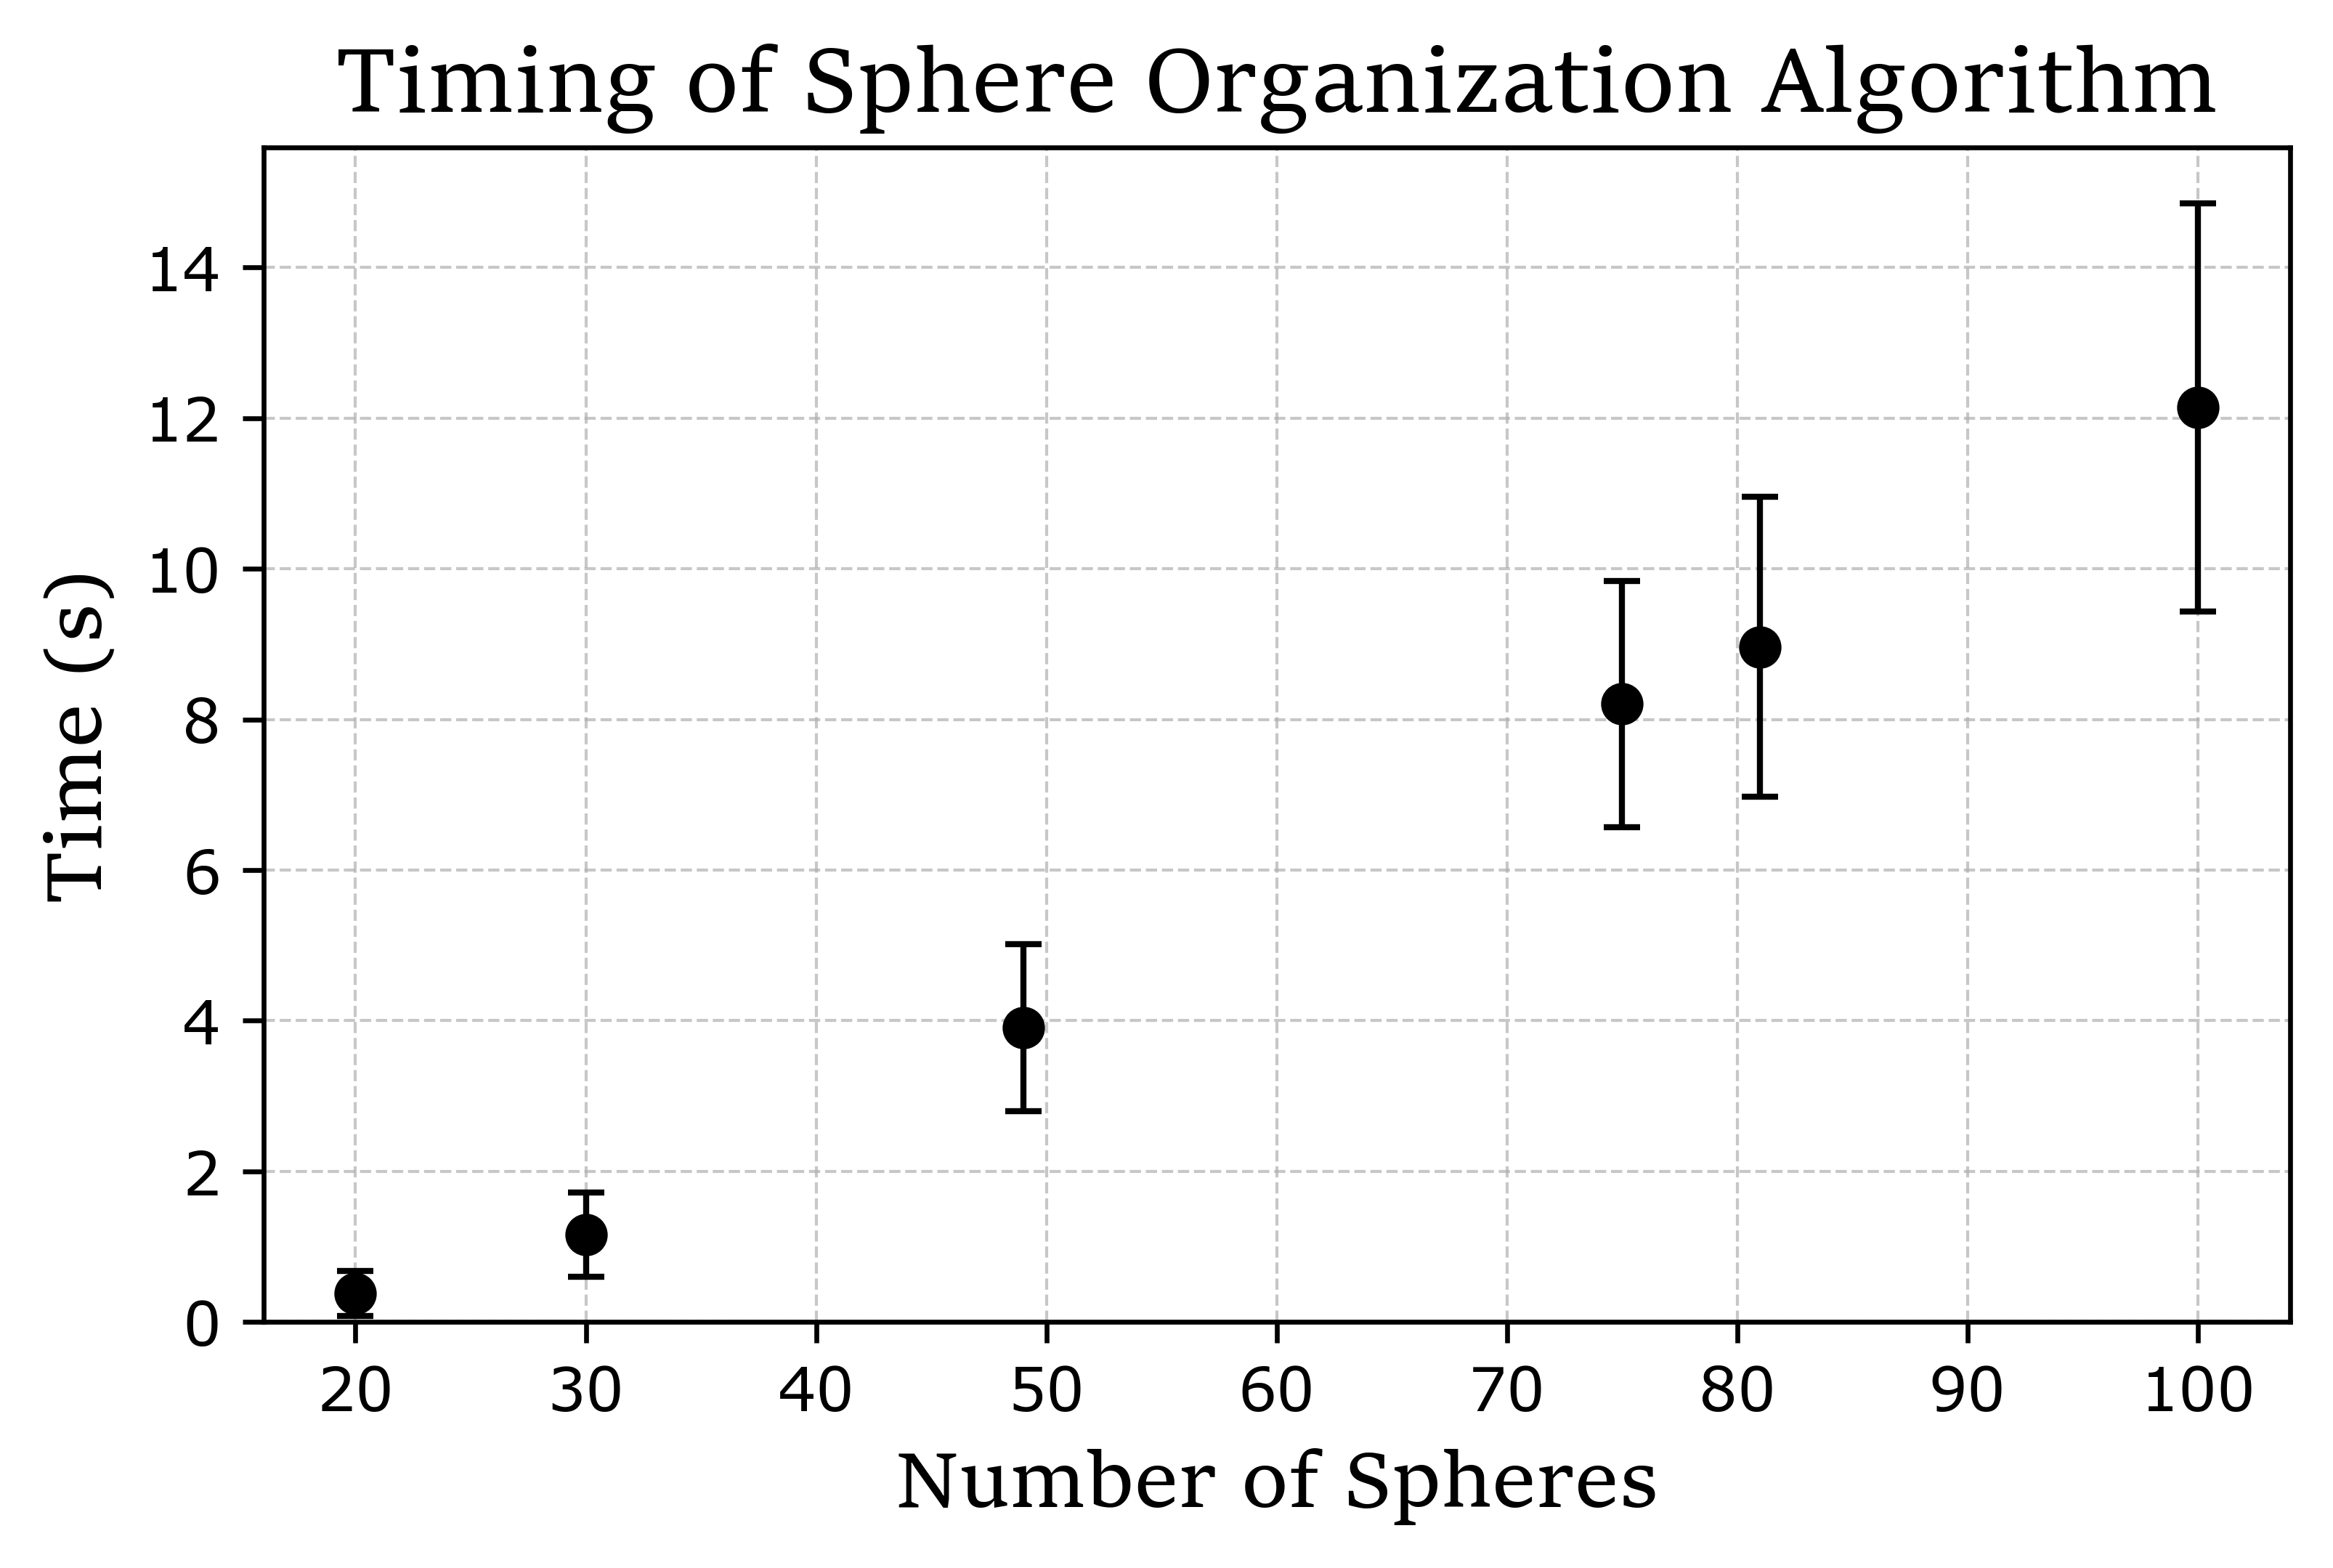

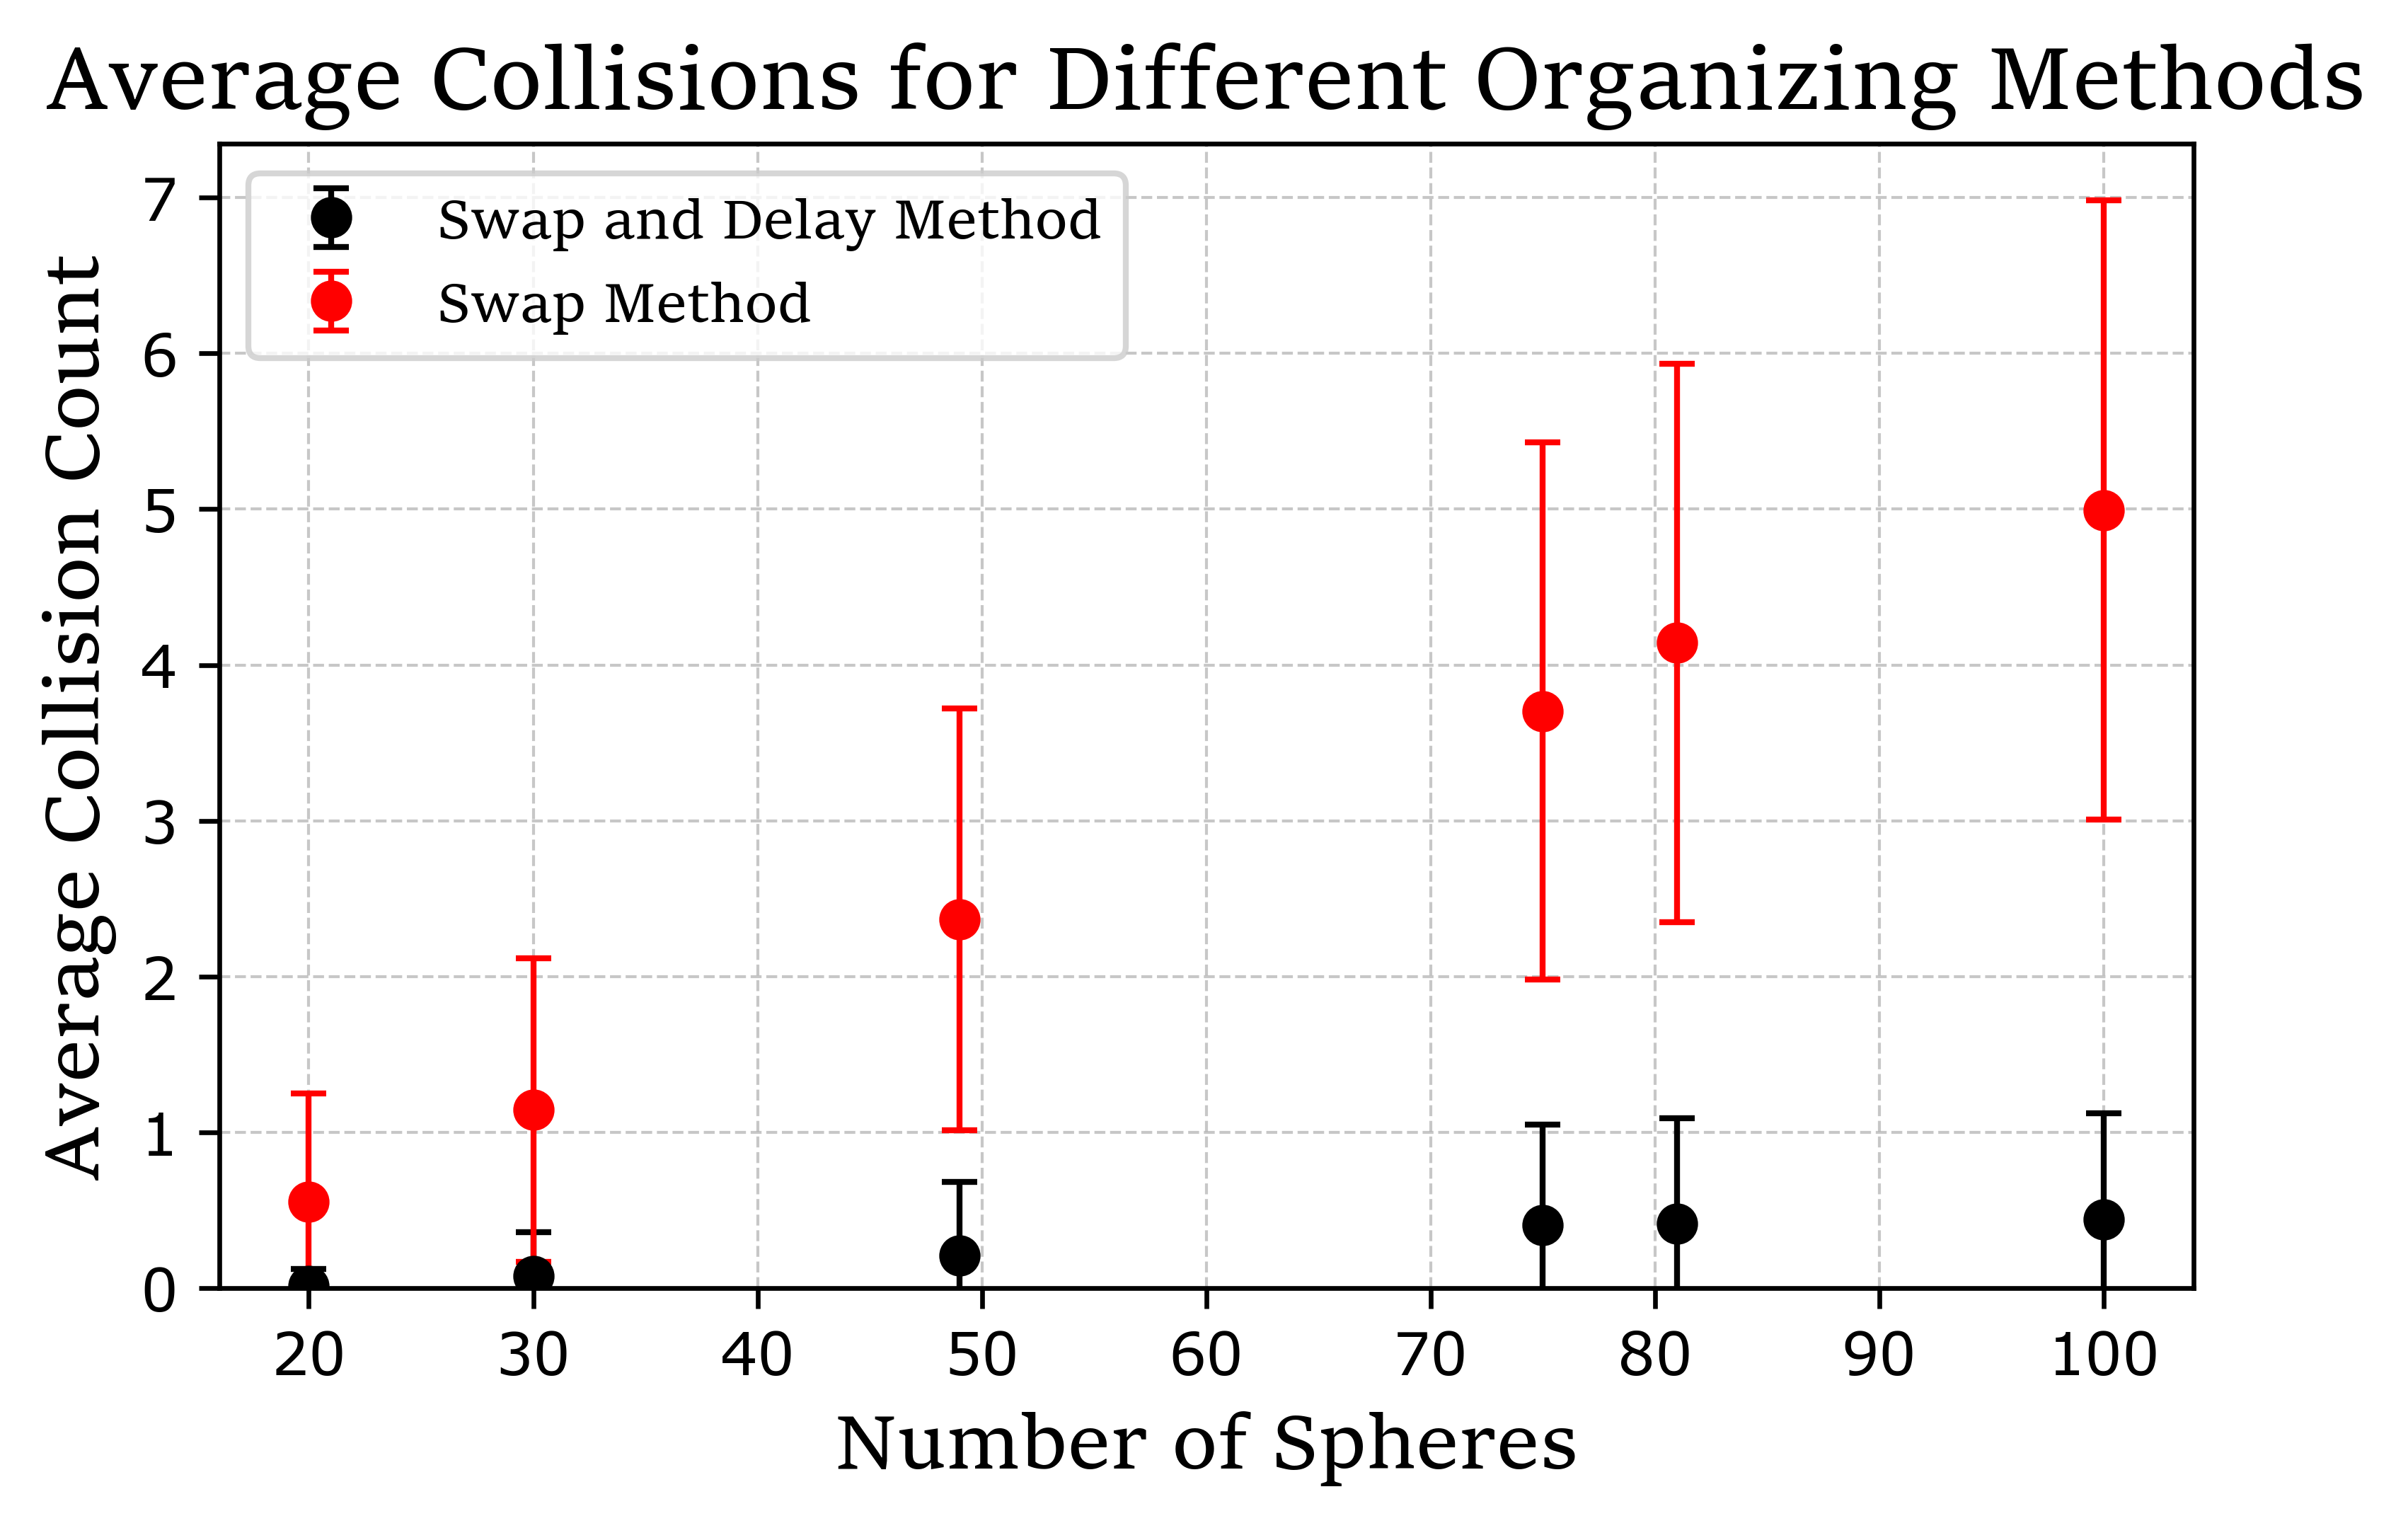

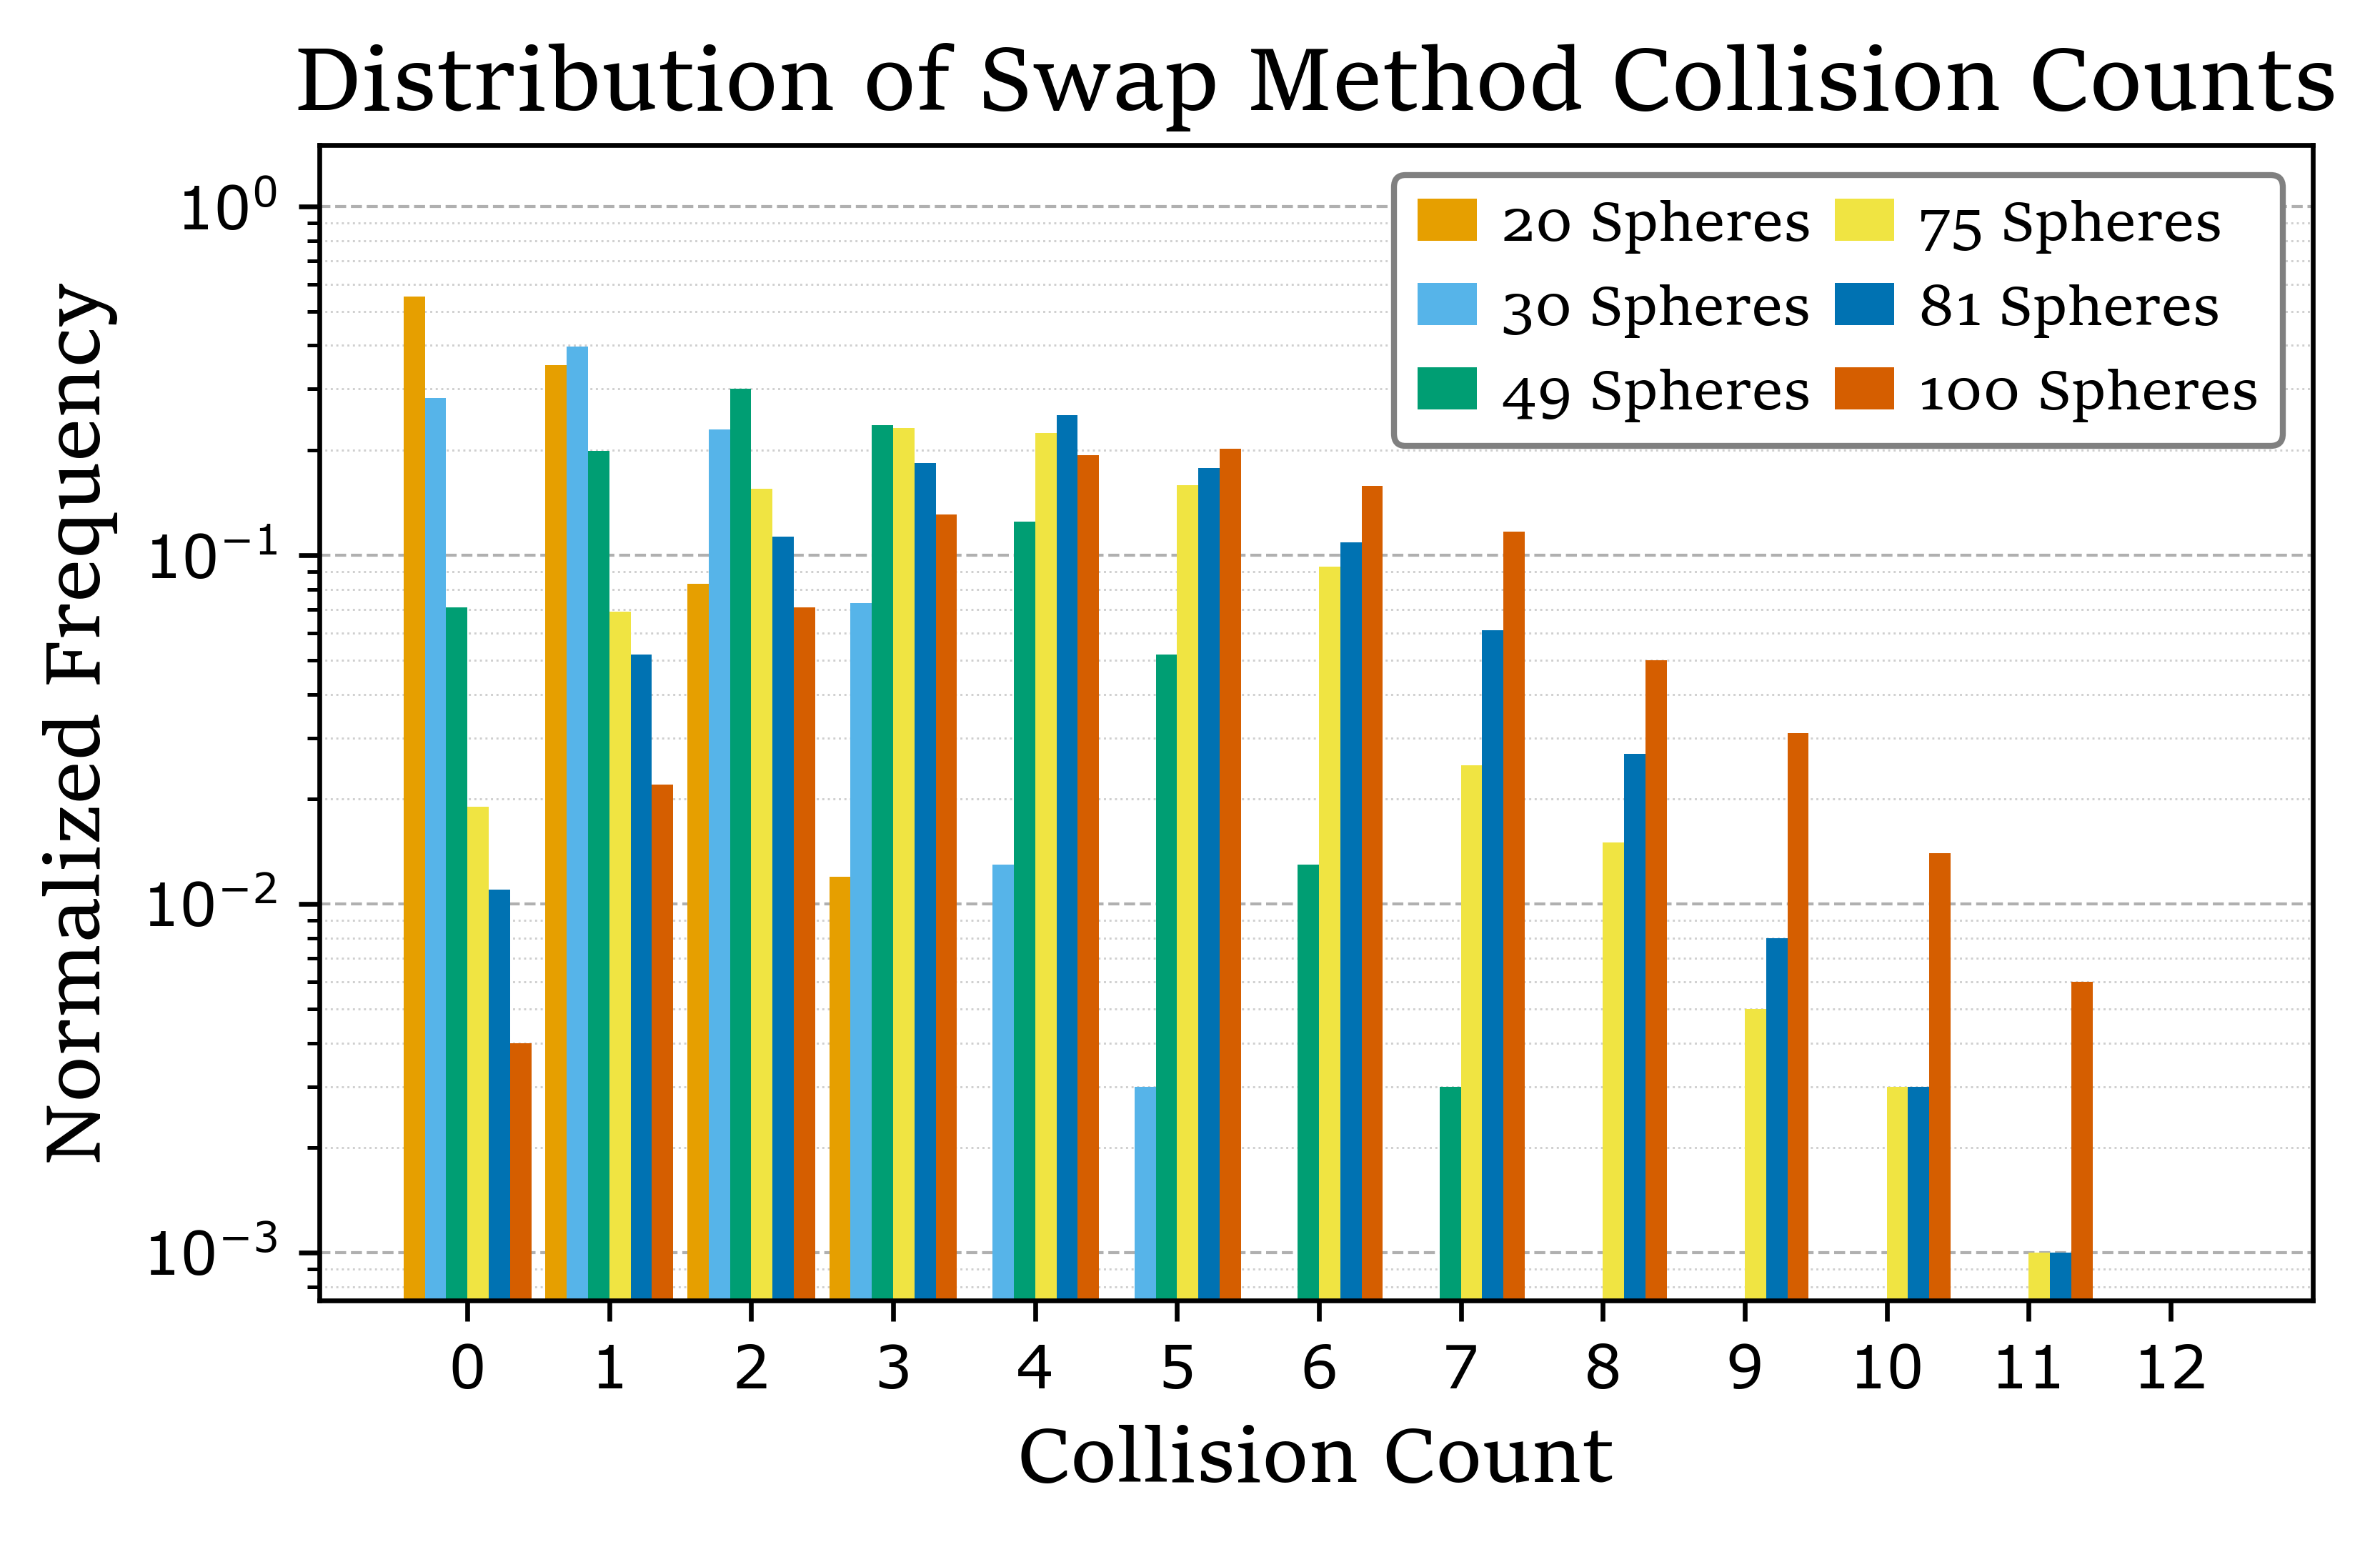

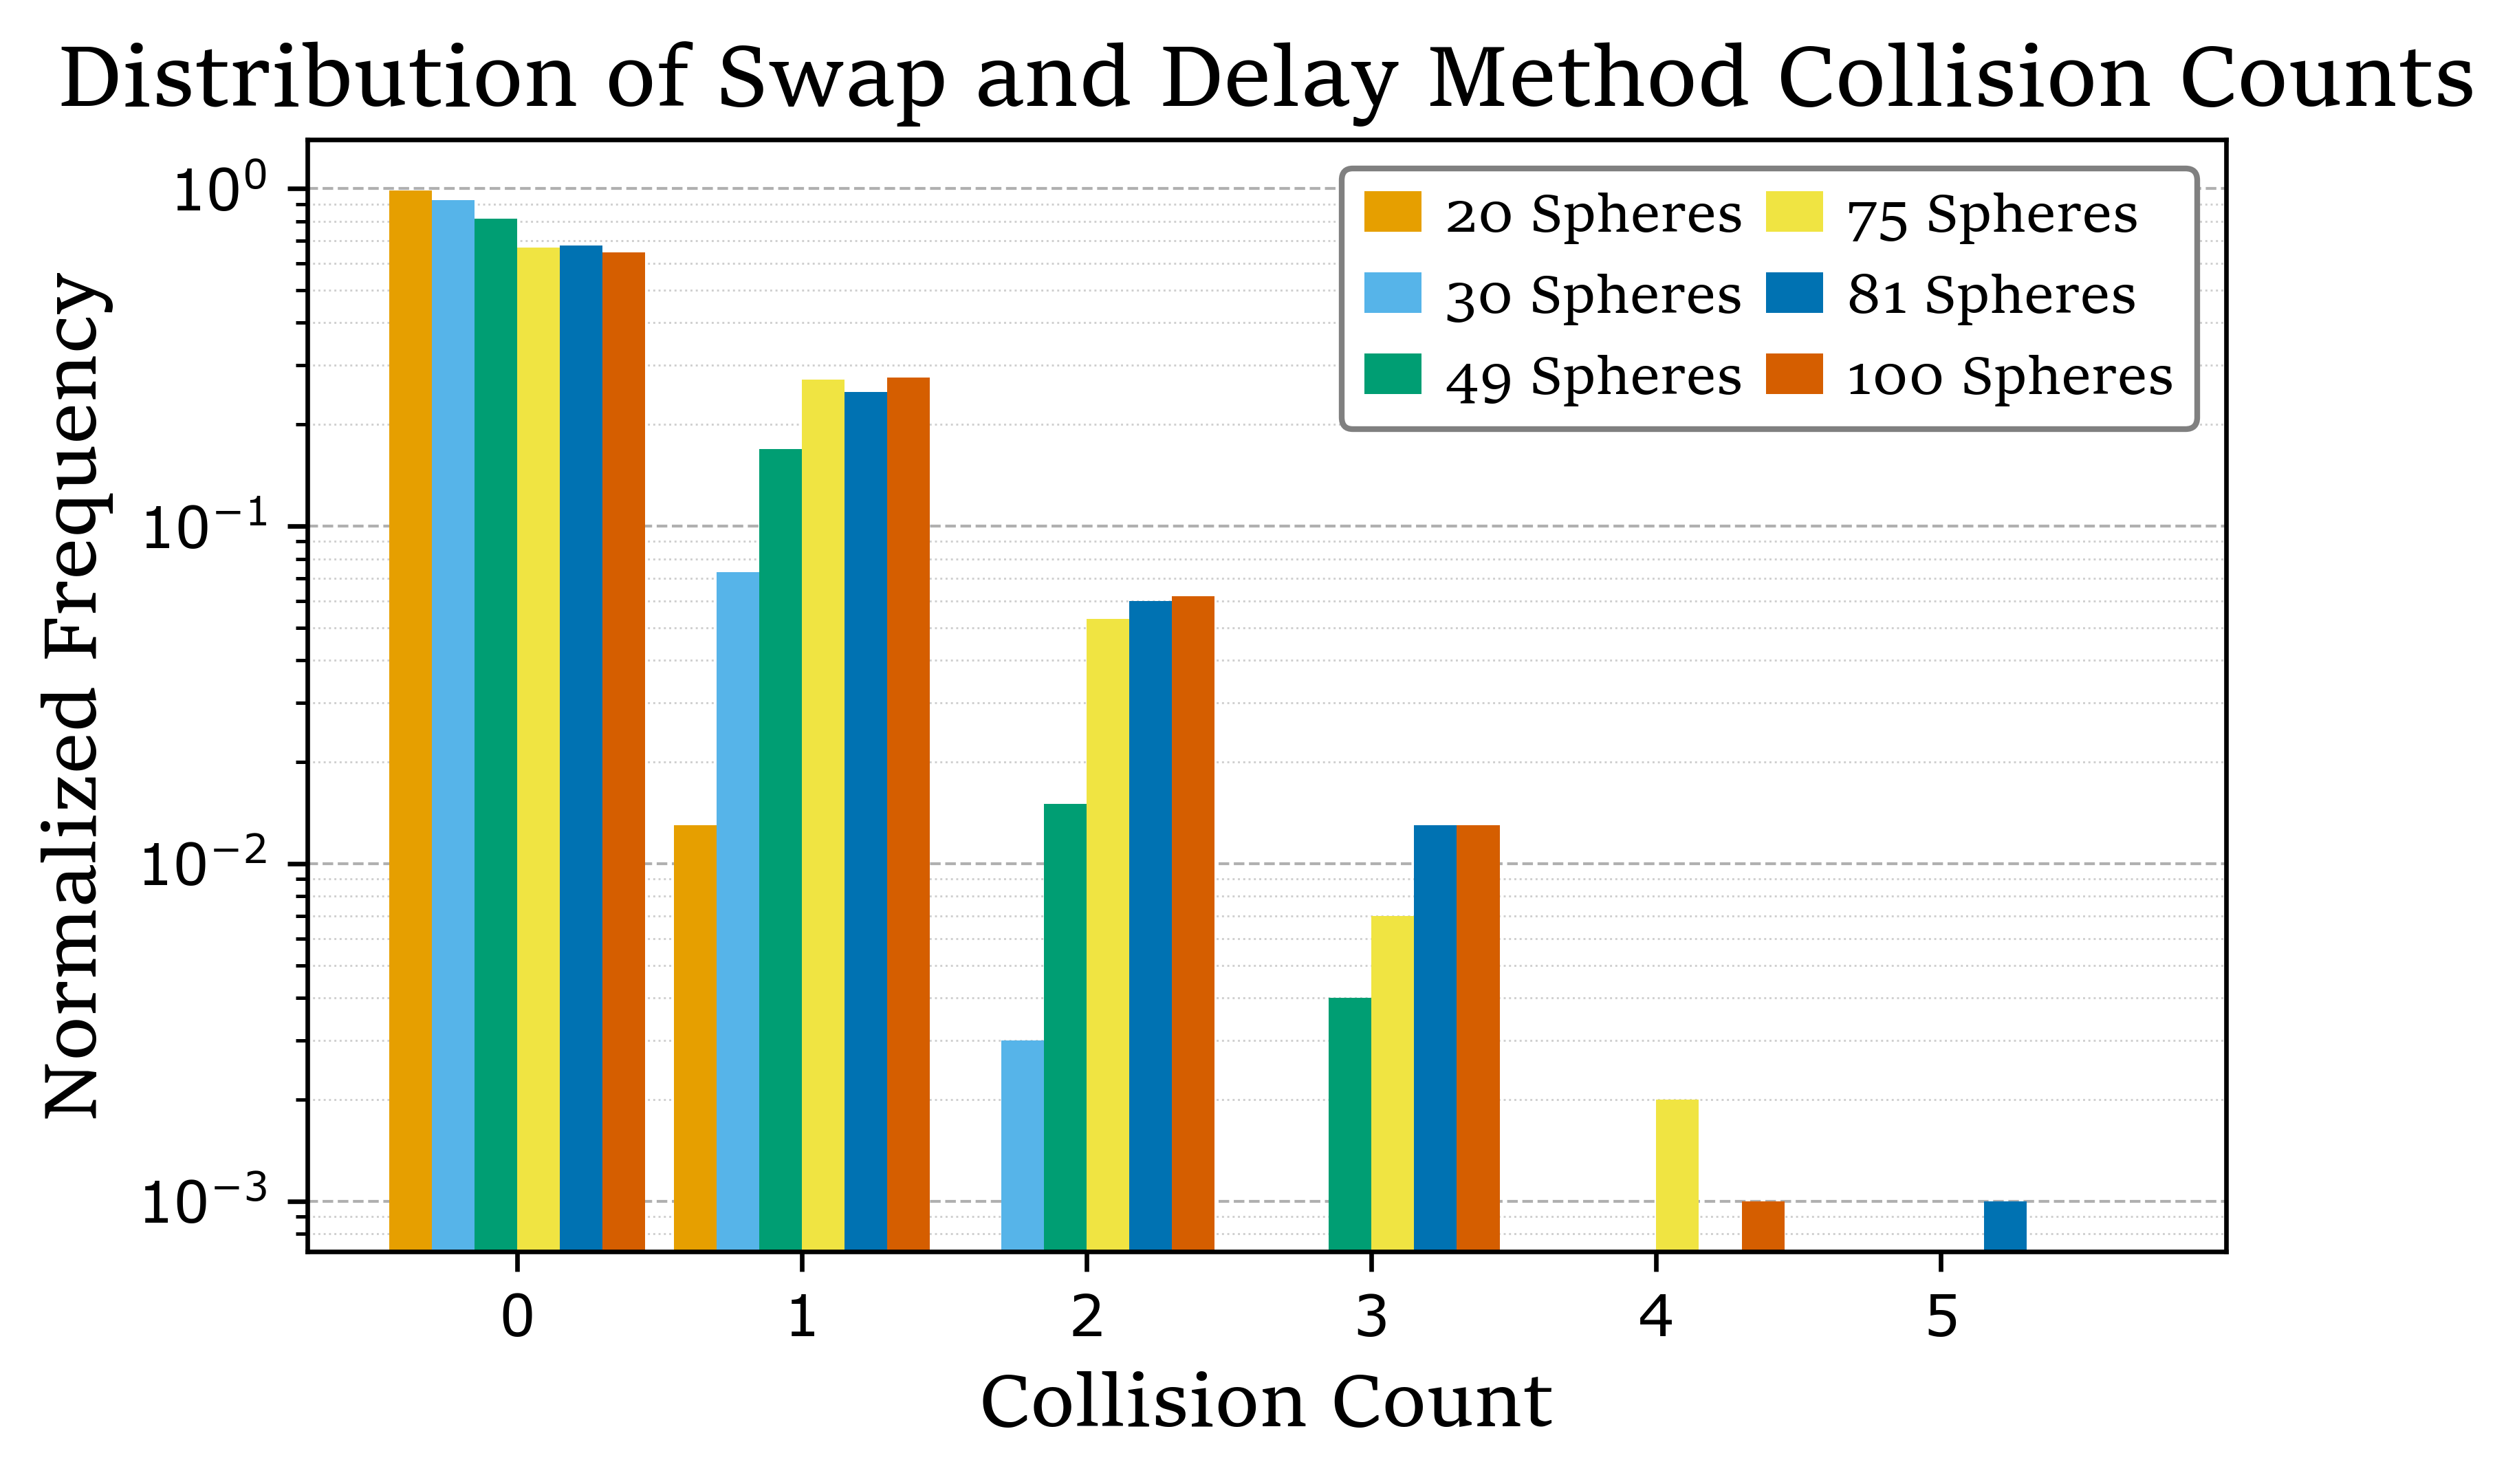

In [5]:
hf = h5py.File(r'C:\Users\Ben\Desktop\simresults\simulationresults_2-8-25.h5', 'r')

res100 = hf.get('100Spheres')
time100 = np.array(res100.get('Timing'))
time100 = time100[time100 <= 100]
intcol100 = np.array(res100.get('Initial Collisions'))
fincol100 = np.array(res100.get('Final Collisions'))

res81 = hf.get('81Spheres')
time81 = np.array(res81.get('Timing'))
time81 = time81[time81 <= 100]
intcol81 = np.array(res81.get('Initial Collisions'))
fincol81 = np.array(res81.get('Final Collisions'))

res75 = hf.get('75Spheres')
time75 = np.array(res75.get('Timing'))
time75 = time75[time75 <= 100]
intcol75 = np.array(res75.get('Initial Collisions'))
fincol75 = np.array(res75.get('Final Collisions'))

res49 = hf.get('49Spheres')
time49 = np.array(res49.get('Timing'))
time49 = time49[time49 <= 100]
intcol49 = np.array(res49.get('Initial Collisions'))
fincol49 = np.array(res49.get('Final Collisions'))

res30 = hf.get('30Spheres')
time30 = np.array(res30.get('Timing'))
time30 = time30[time30 <= 100]
intcol30 = np.array(res30.get('Initial Collisions'))
fincol30 = np.array(res30.get('Final Collisions'))

res20 = hf.get('20Spheres')
time20 = np.array(res20.get('Timing'))
time20 = time20[time20 <= 100]
intcol20 = np.array(res20.get('Initial Collisions'))
fincol20 = np.array(res20.get('Final Collisions'))

hf.close

numspheres = [20, 30, 49, 75, 81, 100]
times = [time20, time30, time49, time75, time81, time100]
intcols = [intcol20, intcol30, intcol49, intcol75, intcol81, intcol100]
fincols = [fincol20, fincol30, fincol49, fincol75, fincol81, fincol100]

figtime, axtime = plt.subplots()
figavgcol, axavgcol = plt.subplots()
figintbar, axintbar = plt.subplots()
figfinbar, axfinbar = plt.subplots()

for i in range(len(numspheres)):
    axtime.errorbar(numspheres[i], np.mean(times[i]), yerr=np.std(times[i]), fmt='o', color='black', ecolor='black', elinewidth=1, capsize=3)
    axavgcol.errorbar(numspheres[i], np.mean(fincols[i]), yerr=np.std(fincols[i]), fmt='o', color='black', ecolor='black', elinewidth=1, capsize=3)
    axavgcol.errorbar(numspheres[i], np.mean(intcols[i]), yerr=np.std(intcols[i]), fmt='o', color='red', ecolor='red', elinewidth=1, capsize=3)
    
    vals, counts = np.unique(intcols[i].astype(int), return_counts=True)
    width = 0.15
    offset = (i - (len(numspheres)-1)/2) * width
    axintbar.bar(vals + offset, counts / 1000, width=width, color=wong_colors[i], label=f'{numspheres[i]} Spheres')

    vals_f, counts_f = np.unique(fincols[i].astype(int), return_counts=True)
    axfinbar.bar(vals_f + offset, counts_f / 1000, width=width, color=wong_colors[i], label=f'{numspheres[i]} Spheres')

    axintbar.set_yscale('log')
    axfinbar.set_yscale('log')


axintbar.set_xticks(np.arange(0, 13))
axfinbar.set_xticks(np.arange(0, 6))

axtime.set_ylim(bottom=0)
axtime.set_title('Timing of Sphere Organization Algorithm',font='Sitka',fontsize=SIZE_DEFAULT + 6)
axtime.set_xlabel('Number of Spheres',font='Sitka',fontsize=SIZE_DEFAULT + 4)
axtime.set_ylabel('Time (s)',font='Sitka',fontsize=SIZE_DEFAULT + 4)
axtime.grid(True, which='both', linestyle='--', linewidth=0.5,alpha=0.7)

axavgcol.set_ylim(bottom=0)
axavgcol.set_title('Average Collisions for Different Organizing Methods',font='Sitka',fontsize=SIZE_DEFAULT + 6)
axavgcol.set_xlabel('Number of Spheres',font='Sitka',fontsize=SIZE_DEFAULT + 4)
axavgcol.set_ylabel('Average Collision Count',font='Sitka',fontsize=SIZE_DEFAULT + 4)
axavgcol.legend(['Swap and Delay Method', 'Swap Method'], prop={'family': 'Sitka'})
axavgcol.grid(True, which='both', linestyle='--', linewidth=0.5,alpha=0.7)

axintbar.set_title('Distribution of Swap Method Collision Counts',font='Sitka',fontsize=SIZE_DEFAULT + 6)
axintbar.set_xlabel('Collision Count',font='Sitka',fontsize=SIZE_DEFAULT + 4)
axintbar.set_ylabel('Normalized Frequency',font='Sitka',fontsize=SIZE_DEFAULT + 4)
axintbar.legend(ncol=2, prop={'family': 'Sitka', 'size': SIZE_DEFAULT},
                handlelength=1, handletextpad=0.4, columnspacing=0.4,
                frameon=True, framealpha=1, edgecolor='gray')
axintbar.set_xlim(right=13)
axintbar.set_ylim(top=1.5)
axintbar.grid(axis='y', which='major', linestyle='--', linewidth=0.5)
axintbar.grid(axis='y', which='minor', linestyle=':', linewidth=0.35, alpha=0.6)
axintbar.set_axisbelow(True)

axfinbar.set_title('Distribution of Swap and Delay Method Collision Counts',font='Sitka',fontsize=SIZE_DEFAULT + 6)
axfinbar.set_xlabel('Collision Count',font='Sitka',fontsize=SIZE_DEFAULT + 4)
axfinbar.set_ylabel('Normalized Frequency',font='Sitka',fontsize=SIZE_DEFAULT + 4)
axfinbar.legend(ncol=2, prop={'family': 'Sitka', 'size': SIZE_DEFAULT},
                handlelength=1, handletextpad=0.4, columnspacing=0.4,
                frameon=True, framealpha=1, edgecolor='gray')
axfinbar.set_xlim(right=6)
axfinbar.grid(axis='y', which='major', linestyle='--', linewidth=0.5)
axfinbar.grid(axis='y', which='minor', linestyle=':', linewidth=0.35, alpha=0.6)

axfinbar.set_axisbelow(True)

plt.show()